In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import time
import tqdm
from datetime import datetime
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.titlesize'] = 18

In [89]:
def calcCorrPenalty(eb, slashed, total):
    return eb * slashed * 3 // total

In [90]:
STAKED_ETH = 24 * 10 ** 6

In [91]:
calcCorrPenalty(2048, 2048, STAKED_ETH), calcCorrPenalty(2048, STAKED_ETH / 3, STAKED_ETH)

(0, 2048.0)

In [123]:
slashed_amts = np.arange(0, STAKED_ETH / 3, 2048)
corrs32 = np.asarray([calcCorrPenalty(32, i, STAKED_ETH) for i in slashed_amts])
corrs256 = np.asarray([calcCorrPenalty(256, i, STAKED_ETH) for i in slashed_amts])
corrs2048 = np.asarray([calcCorrPenalty(2048, i, STAKED_ETH) for i in slashed_amts])

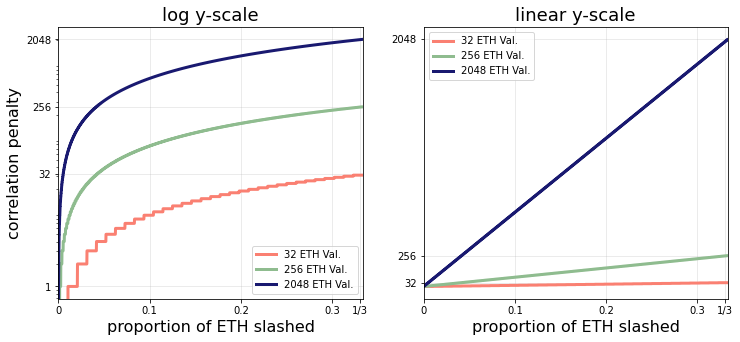

In [124]:
f, axarr = plt.subplots(ncols= 2,figsize=(12,5))

for ax in axarr:
    ax.plot(slashed_amts/STAKED_ETH, corrs32, color='salmon', label='32 ETH Val.', linewidth=3)
    ax.plot(slashed_amts/STAKED_ETH, corrs256, color='darkseagreen', label='256 ETH Val.', linewidth=3)
    ax.plot(slashed_amts/STAKED_ETH, corrs2048, color='midnightblue', label='2048 ETH Val.', linewidth=3)
    

axarr[0].set_yscale('log')
axarr[0].set_yticks([1, 32, 256, 2048])
axarr[0].set_yticklabels(['1', '32', '256', '2048'])

axarr[1].set_yticks([32, 256, 2048])
axarr[1].set_yticklabels(['32', '256', '2048'])


for ax in axarr:
    ax.legend()
    ax.set_xlim(0, 1/3)
    ax.set_xticks([0, 0.1, 0.2, 0.3, 0.33])
    ax.set_xticklabels(['0', '0.1', '0.2', '0.3', '1/3'])
    ax.set_xlabel('proportion of ETH slashed', size=16)

axarr[0].set_ylabel('correlation penalty', size=16)
axarr[0].set_title('log y-scale', size=18)
axarr[1].set_title('linear y-scale', size=18)
plt.show()

In [134]:
def calcCorrPenaltyNew(eb, slashed, total):
    return eb * np.power(slashed, 2) * np.power(3, 2) // np.power(total, 2)

In [135]:
STAKED_ETH = 24 * 10 ** 6

In [136]:
calcCorrPenaltyNew(2048, 2048, STAKED_ETH), calcCorrPenalty(2048, STAKED_ETH / 3, STAKED_ETH)

(0, 2048.0)

In [250]:
slashed_amts = np.arange(0, STAKED_ETH / 3, 2048)
corrs32new = np.asarray([calcCorrPenaltyNew(32, i, STAKED_ETH) for i in slashed_amts])
corrs256new = np.asarray([calcCorrPenaltyNew(256, i, STAKED_ETH) for i in slashed_amts])
corrs2048new = np.asarray([calcCorrPenaltyNew(2048, i, STAKED_ETH) for i in slashed_amts])

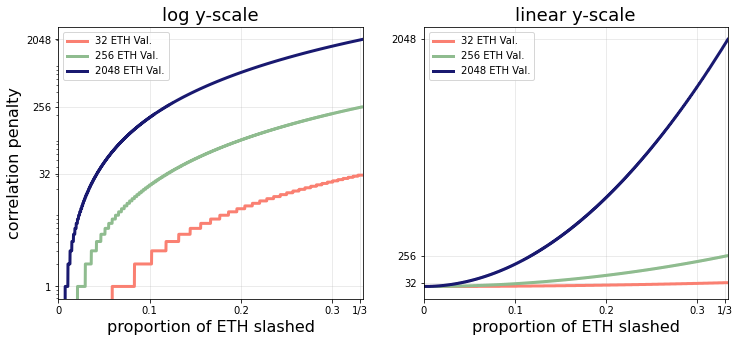

In [138]:
f, axarr = plt.subplots(ncols= 2,figsize=(12,5))

for ax in axarr:
    ax.plot(slashed_amts/STAKED_ETH, corrs32new, color='salmon', label='32 ETH Val.', linewidth=3)
    ax.plot(slashed_amts/STAKED_ETH, corrs256new, color='darkseagreen', label='256 ETH Val.', linewidth=3)
    ax.plot(slashed_amts/STAKED_ETH, corrs2048new, color='midnightblue', label='2048 ETH Val.', linewidth=3)
    

axarr[0].set_yscale('log')
axarr[0].set_yticks([1, 32, 256, 2048])
axarr[0].set_yticklabels(['1', '32', '256', '2048'])

axarr[1].set_yticks([32, 256, 2048])
axarr[1].set_yticklabels(['32', '256', '2048'])


for ax in axarr:
    ax.legend()
    ax.set_xlim(0, 1/3)
    ax.set_xticks([0, 0.1, 0.2, 0.3, 0.33])
    ax.set_xticklabels(['0', '0.1', '0.2', '0.3', '1/3'])
    ax.set_xlabel('proportion of ETH slashed', size=16)

axarr[0].set_ylabel('correlation penalty', size=16)
axarr[0].set_title('log y-scale', size=18)
axarr[1].set_title('linear y-scale', size=18)
plt.show()

In [225]:
2048 * 1000

2048000

In [252]:
## zoomed in version
slashed_amts = np.arange(0, 2048 * 500, 2048)

zoomed32 = np.asarray([calcCorrPenalty(32, i, STAKED_ETH) for i in slashed_amts])
zoomed256 = np.asarray([calcCorrPenalty(256, i, STAKED_ETH) for i in slashed_amts])
zoomed2048 = np.asarray([calcCorrPenalty(2048, i, STAKED_ETH) for i in slashed_amts])

zoomed32new = np.asarray([calcCorrPenaltyNew(32, i, STAKED_ETH) for i in slashed_amts])
zoomed256new = np.asarray([calcCorrPenaltyNew(256, i, STAKED_ETH) for i in slashed_amts])
zoomed2048new = np.asarray([calcCorrPenaltyNew(2048, i, STAKED_ETH) for i in slashed_amts])

In [242]:
500 * 2048

1024000

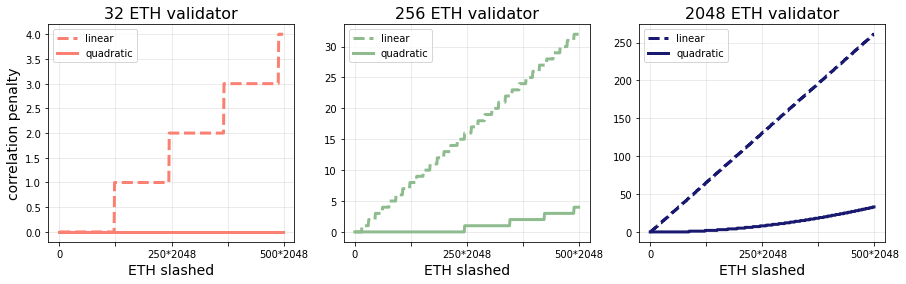

In [258]:
f, axarr = plt.subplots(ncols=3, figsize=(15,4))

axarr[0].plot(slashed_amts, zoomed32, color='salmon', label='linear', linewidth=3, linestyle='--')
axarr[1].plot(slashed_amts, zoomed256, color='darkseagreen', label='linear', linewidth=3, linestyle='--')
axarr[2].plot(slashed_amts, zoomed2048, color='midnightblue', label='linear', linewidth=3, linestyle='--')

axarr[0].plot(slashed_amts, zoomed32new, color='salmon', label='quadratic', linewidth=3)
axarr[1].plot(slashed_amts, zoomed256new, color='darkseagreen', label='quadratic', linewidth=3)
axarr[2].plot(slashed_amts, zoomed2048new, color='midnightblue', label='quadratic', linewidth=3)

for ax in axarr:
    ax.legend()
    ax.set_xticks([0, 125 * 2048, 250 * 2048, 375 * 2048, 500 * 2048])
    ax.set_xticklabels(['0', '', '250*2048', '', '500*2048'])
    ax.set_xlabel('ETH slashed', size=14)

axarr[0].set_ylabel('correlation penalty', size=14)
axarr[0].set_title('32 ETH validator', size=16)
axarr[1].set_title('256 ETH validator', size=16)
axarr[2].set_title('2048 ETH validator', size=16)
plt.show()

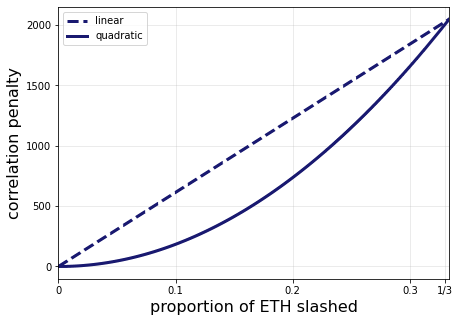

In [251]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(slashed_amts/STAKED_ETH, corrs2048, color='midnightblue', linestyle='--', label='linear', linewidth=3)
ax.plot(slashed_amts/STAKED_ETH, corrs2048new, color='midnightblue', label='quadratic', linewidth=3)

ax.legend()
ax.set_xlim(0, 1/3)
ax.set_xticks([0, 0.1, 0.2, 0.3, 0.33])
ax.set_xticklabels(['0', '0.1', '0.2', '0.3', '1/3'])
ax.set_xlabel('proportion of ETH slashed', size=16)
ax.set_ylabel('correlation penalty', size=16)

plt.show()

In [206]:
# per epoch attn penalty
def attnPenalty(eb):
    base_rew = 64 * 1_000_000_000 // np.floor(np.sqrt(24_000_000_000_000_000))
    return base_rew * eb * (14 + 26) / 64

In [207]:
64 * 1_000_000_000 // np.floor(np.sqrt(24_000_000_000_000_000))

413.0

In [212]:
8192 * attnPenalty(32) / 1_000_000_000, 8192 * attnPenalty(2048) / 1_000_000_000

(0.06766592, 4.33061888)

In [213]:
0.06766592 * 64

4.33061888

In [200]:
attnPenalty(32) * 8192 / 1_000_000_000

0.06766592

In [201]:
stakes = np.arange(32, 2048)
aps = np.asarray([attnPenalty(e) for e in stakes])

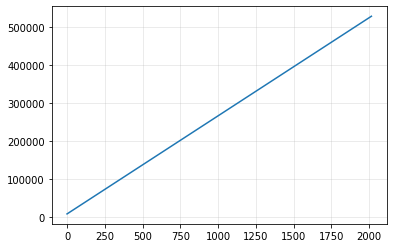

In [203]:
plt.plot(aps)

In [216]:
# leak amount
def calcLeak(eb, epochs):
    total_penalty = 0
    score = 0
    for i in range(epochs):
        score += 4
        num = 1_000_000_000 * eb * score
        den = 4 * 2**24
        total_penalty += num // den
    return total_penalty

In [224]:
eb = 2048
calcLeak(eb, 16) / 1_000_000_000, calcLeak(eb, 128) / 1_000_000_000, calcLeak(eb, 1024) / 1_000_000_000

(0.016601555, 1.00781244, 64.06249952)

In [291]:
# sub-linear scaling

vals = np.arange(32, 2048)
linear = vals / 32
const = np.zeros(len(vals)) + 1
sqrt = np.power(vals, 1/2) / 32
p34 = np.power(vals, 3/4) / 32
p78 = np.power(vals, 7/8) / 32
p1516 = np.power(vals, 15/16) / 32

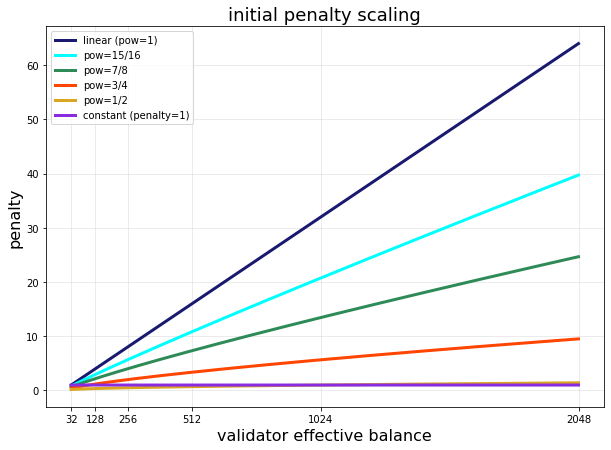

In [300]:
f, ax = plt.subplots(figsize=(10,7))

ax.plot(vals, linear, color='midnightblue', label='linear (pow=1)', linewidth=3)
ax.plot(vals, p1516, color='cyan', label='pow=15/16', linewidth=3)
ax.plot(vals, p78, color='seagreen', label='pow=7/8', linewidth=3)
ax.plot(vals, p34, color='orangered', label='pow=3/4', linewidth=3)
ax.plot(vals, sqrt, color='goldenrod', label='pow=1/2', linewidth=3)
ax.plot(vals, const, color='blueviolet', label='constant (penalty=1)', linewidth=3)

ax.legend()
ax.set_xlabel('validator effective balance', size=16)
ax.set_ylabel('penalty', size=16)
ax.set_title('initial penalty scaling', size=18)

ax.set_xticks([32, 128, 256, 512, 1024, 2048])
ax.set_xticklabels([str(i) for i in ax.get_xticks()])

plt.show()